In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tables
from random import shuffle
from IPython.display import clear_output
from sklearn import metrics
import time
import seaborn as sns
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [41]:
from ipywidgets import Button, Layout
from ipywidgets import interactive

### Exploratory Data Analysis

In [5]:
spmt_hits = pd.read_csv('train_spmt_n_hits.csv') 
spmt_hits.shape

(10000, 2)

In [6]:
lpmt_hits = pd.read_csv('train_lpmt_n_hits.csv') 
lpmt_hits.shape

(10000, 2)

In [7]:
lpmt_hits.head()

,event_id,nHits
0,0,8902
1,1,7305
2,3,6718
3,4,5966
4,5,12744


In [8]:
spmt_hits.head()

,event_id,nHits
0,0,212
1,1,191
2,3,162
3,4,180
4,5,310


In [20]:
spmt_pos = pd.read_csv("spmt_pos.csv")
spmt_pos.shape

(24952, 4)

In [23]:
spmt_pos.head()

,pmt_id,pmt_x,pmt_y,pmt_z
0,300000,1.384810e+03,244.17944,19148.438
1,300001,1.217782e+03,703.08670,19148.438
2,300002,9.038709e+02,1077.19130,19148.438
3,300003,4.809396e+02,1321.37070,19148.438
4,300004,8.610328e-14,1406.17330,19148.438


In [24]:
lpmt_pos = pd.read_csv("lpmt_pos.csv")
lpmt_pos.shape

(17739, 4)

In [26]:
lpmt_pos.head()

,pmt_id,pmt_x,pmt_y,pmt_z
0,0,1.049021e+03,0.0000,19171.32
1,1,9.084785e+02,524.5103,19171.32
2,2,5.245103e+02,908.4785,19171.32
3,3,6.423399e-14,1049.0206,19171.32
4,4,-5.245103e+02,908.4785,19171.32


In [11]:
lpmt_hits = pd.read_hdf('train_lpmt_hits.h5', mode='r') 
lpmt_hits.shape

(92717003, 4)

In [12]:
lpmt_hits.head()

,event,hitTime,isDN,pmtID
0,0,249.992615,False,14175
1,0,40.010311,False,17319
2,0,162.123199,False,16882
3,0,51.875614,False,14951
4,0,79.817497,False,10947


In [15]:
spmt_hits = pd.read_hdf('train_spmt_hits.h5', mode='r')
spmt_hits.shape

(2314146, 4)

In [16]:
spmt_hits.head()

,event,hitTime,isDN,pmtID
0,0,238.278091,False,311819
1,0,103.316055,False,307244
2,0,108.034225,False,323230
3,0,36.505154,False,320568
4,0,34.109840,False,316487


In [27]:
event_id = 10000
lpmt_event_hits = lpmt_hits.loc[lpmt_hits['event'] == event_id]
spmt_event_hits = spmt_hits.loc[spmt_hits['event'] == event_id]

In [28]:
lpmt_hits_values = lpmt_event_hits['pmtID'].values
spmt_hits_values = spmt_event_hits['pmtID'].values

In [29]:
lpmt_hits_mask = []
for t in lpmt_pos.itertuples():
    if t[1] in lpmt_hits_values:
        lpmt_hits_mask.append("g")
    else:
        lpmt_hits_mask.append("r")
        
spmt_hits_mask = []
for t in spmt_pos.itertuples():
    if t[1] in spmt_hits_values:
        spmt_hits_mask.append("g")
    else:
        spmt_hits_mask.append("r")

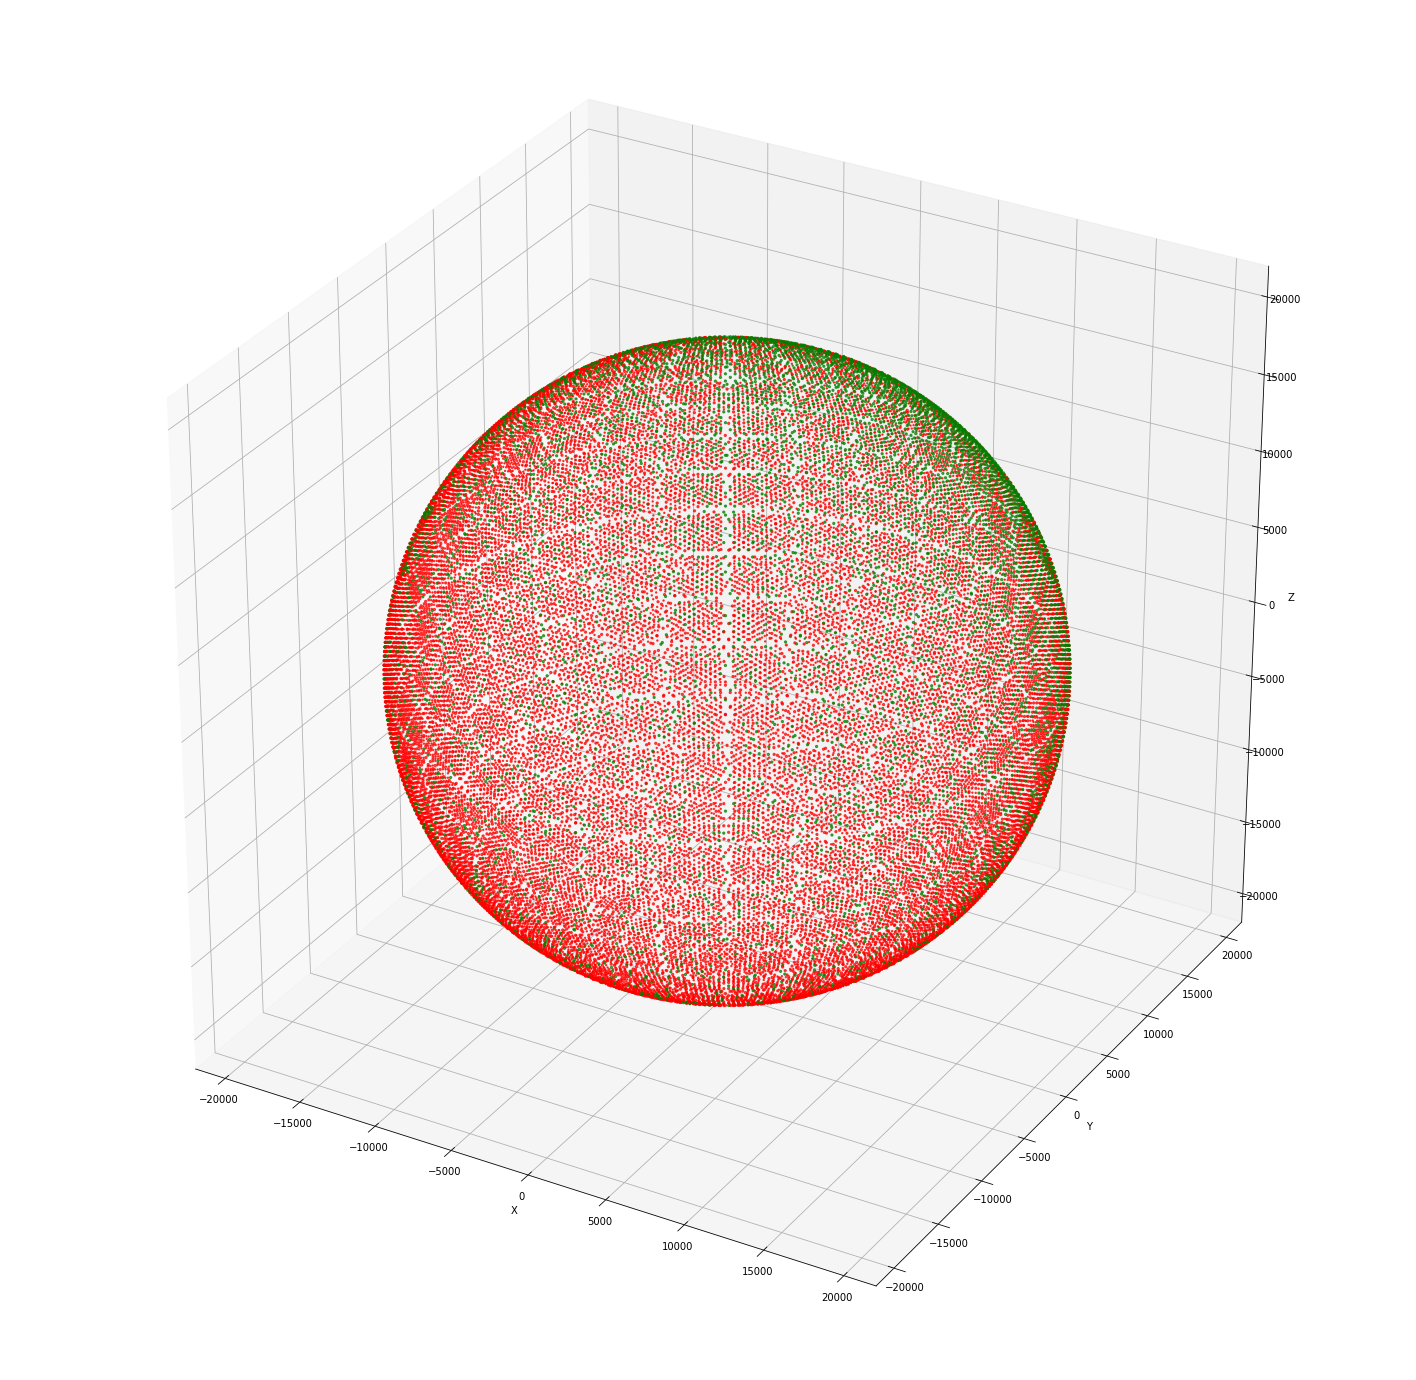

In [30]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

x = lpmt_pos['pmt_x']
y = lpmt_pos['pmt_y']
z = lpmt_pos['pmt_z']

ax.scatter(x, y, z, c=lpmt_hits_mask, marker='o', s=5, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

x = spmt_pos['pmt_x']
y = spmt_pos['pmt_y']
z = spmt_pos['pmt_z']

ax.scatter(x, y, z, c=spmt_hits_mask, marker='o', s=2, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Signal without DN

In [31]:
lpmt_event_hits_without_DN = lpmt_event_hits.loc[lpmt_event_hits['isDN'] == False]
spmt_event_hits_without_DN = spmt_event_hits.loc[spmt_event_hits['isDN'] == False]

In [32]:
lpmt_hits_values2 = lpmt_event_hits_without_DN['pmtID'].values
spmt_hits_values2 = lpmt_event_hits_without_DN ['pmtID'].values

In [33]:
lpmt_hits_mask2 = []
for t in lpmt_pos.itertuples():
    if t[1] in lpmt_hits_values2:
        lpmt_hits_mask2.append("g")
    else:
        lpmt_hits_mask2.append("r")
        
spmt_hits_mask2 = []
for t in spmt_pos.itertuples():
    if t[1] in spmt_hits_values2:
        spmt_hit_mask2.append("g")
    else:
        spmt_hits_mask2.append("r")

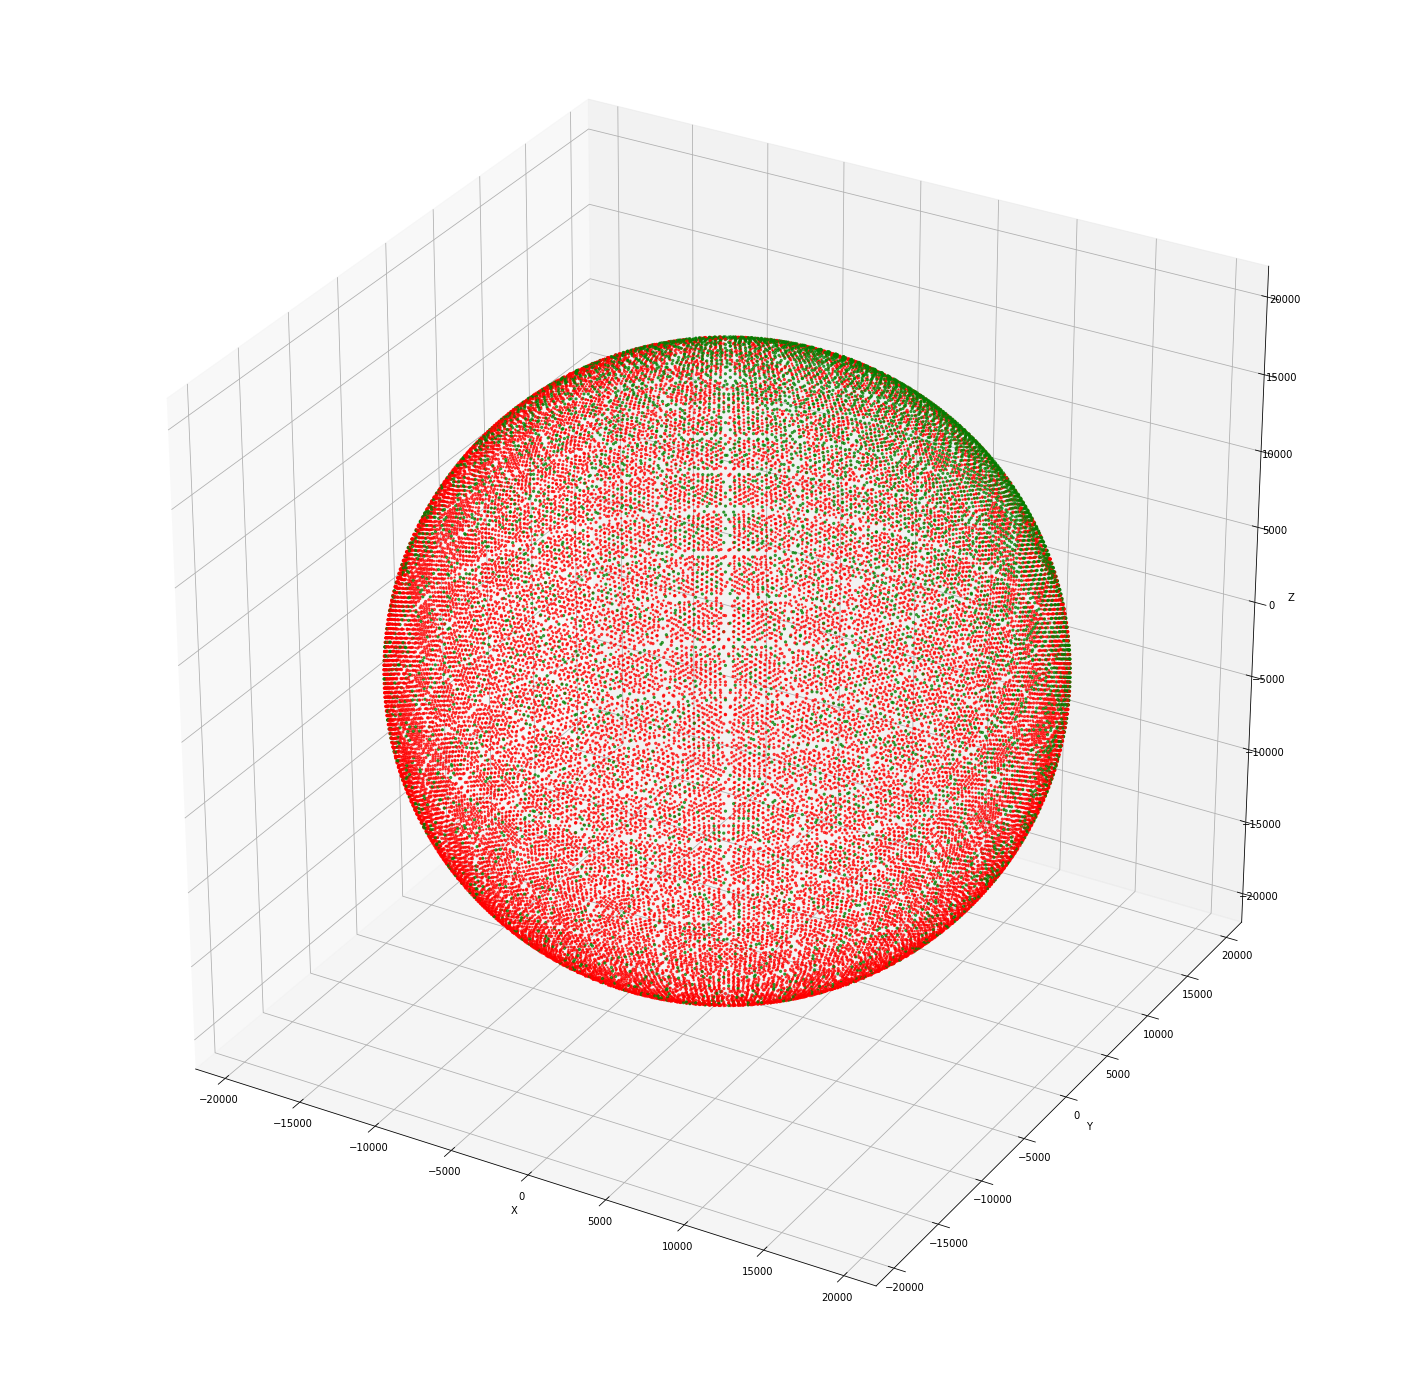

In [34]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

x = lpmt_pos['pmt_x']
y = lpmt_pos['pmt_y']
z = lpmt_pos['pmt_z']

ax.scatter(x, y, z, c=lpmt_hits_mask2, marker='o', s=5, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

x = spmt_pos['pmt_x']
y = spmt_pos['pmt_y']
z = spmt_pos['pmt_z']

ax.scatter(x, y, z, c=spmt_hits_mask2, marker='o', s=2, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

#### Only signal

In [35]:
x = []
y = []
z = []
for t in lpmt_pos.itertuples():
    if t[1] in lpmt_hits_values2:
        x.append(t[2])
        y.append(t[3])
        z.append(t[4])
        
for t in spmt_pos.itertuples():
    if t[1] in spmt_hits_values2:
        x.append(t[2])
        y.append(t[3])
        z.append(t[4])

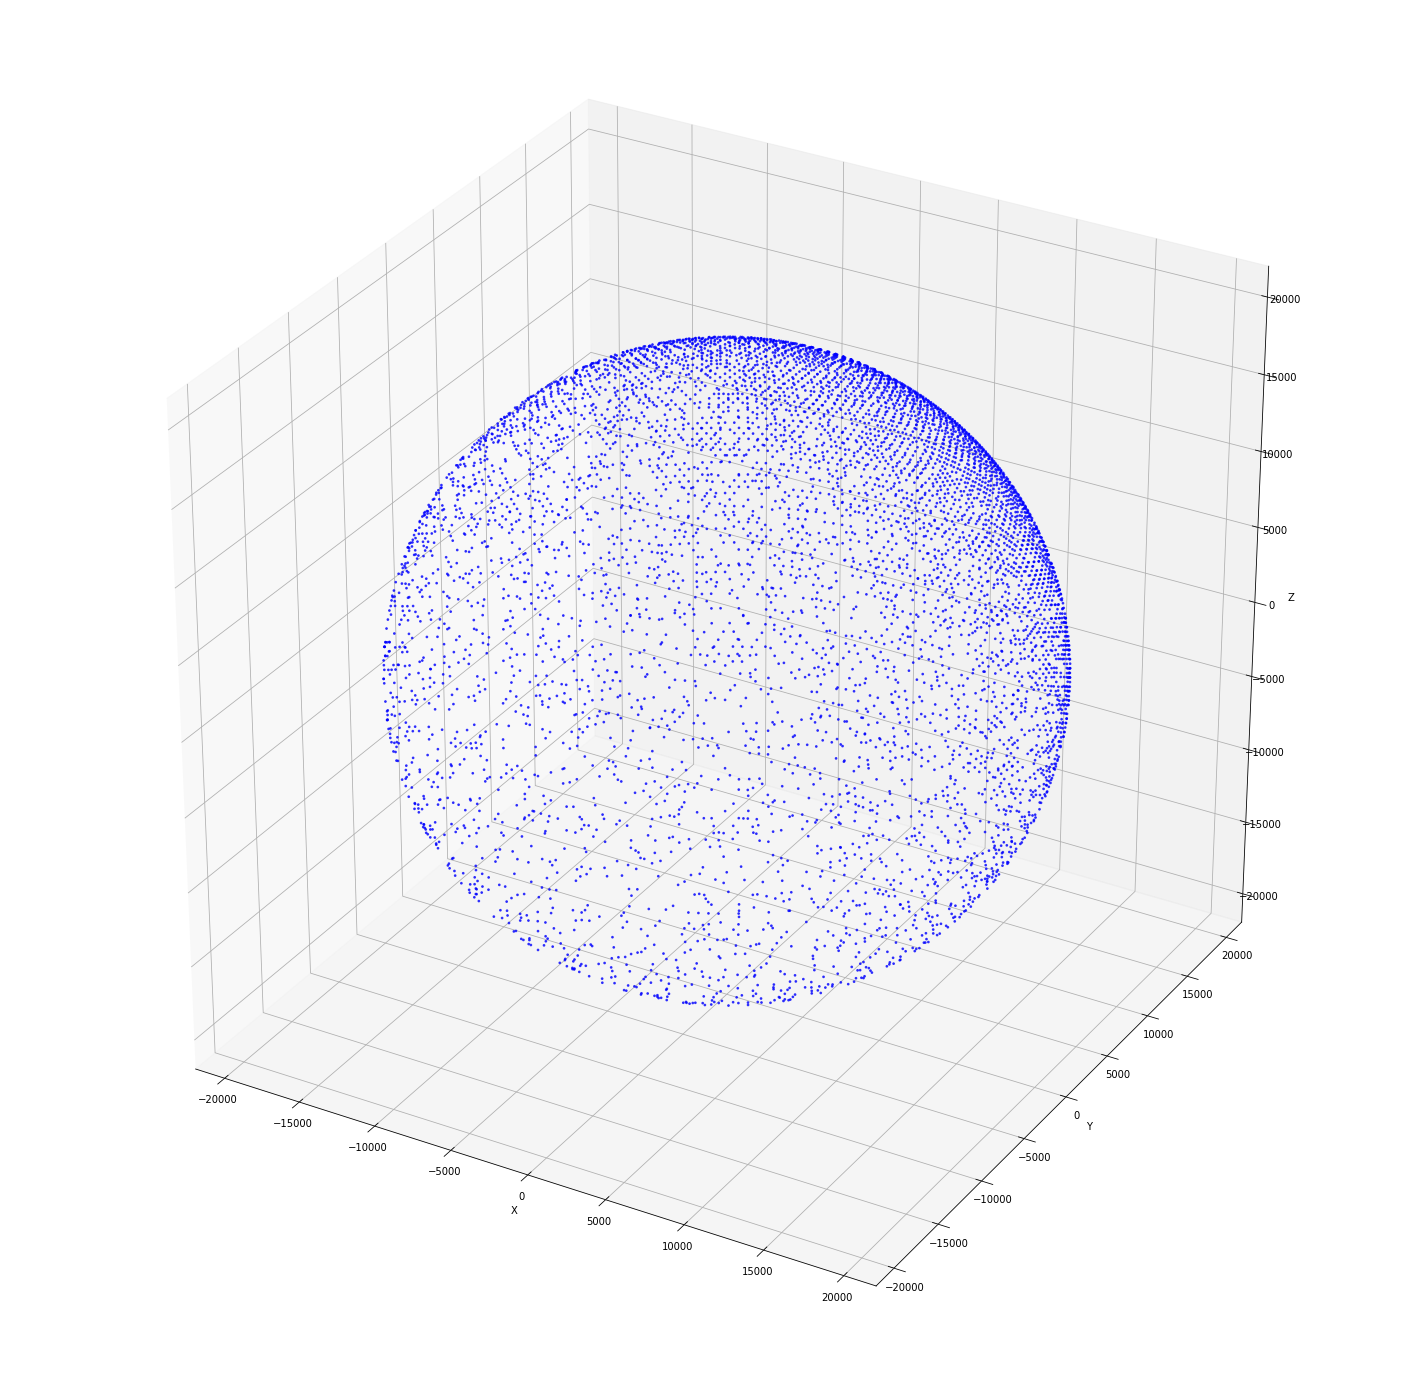

In [36]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o', s=3, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [37]:
lpmt_time = lpmt_event_hits_without_DN['hitTime'].values
print(min(lpmt_time))
print(max(lpmt_time))

18.51124
889.8253


In [38]:
spmt_time = spmt_event_hits_without_DN['hitTime'].values
print(min(spmt_time))
print(max(spmt_time))

19.61353
415.14053


In [44]:
def rotate(data, r0, r1):
    a1 = r0 * np.pi
    
    data = np.dot(np.array(
        [[1,          0,           0],
         [0, np.cos(a1), -np.sin(a1)],
         [0, np.sin(a1),  np.cos(a1)]]
        
    ), data)
    
    a2 = r1 * np.pi
    
    data = np.dot(np.array(
        [[ np.cos(a2), 0,  np.sin(a2)],
         [          0, 1,           0],
         [-np.sin(a2), 0,  np.cos(a2)]]
        
    ), data)

    return data

def genrate_equator():
    data = np.zeros((3, 1001))
    
    r = 19000.0
    
    for i in range(1001):
        a = i / 1000 * 2 * np.pi
        data[0, i] = np.sin(a) * r
        data[1, i] = np.cos(a) * r

    return data

def genrate_equator2():
    data = np.zeros((3, 1001))
    
    r = 19000.0
    
    for i in range(1001):
        a = i / 1000 * 2 * np.pi
        data[0, i] = np.sin(a) * r
        data[2, i] = np.cos(a) * r

    return data

def f(t0, t1, r0, r1):    
    ldf = lpmt_event_hits_without_DN
    sdf = spmt_event_hits_without_DN
        
    l_hits = ldf['pmtID'].values
    s_hits = sdf['pmtID'].values
    
    un1, c1 = np.unique(l_hits, return_counts=True)
    l_hits_dict = dict(zip(un1, c1))

    un2, c2 = np.unique(s_hits, return_counts=True)
    s_hits_dict = dict(zip(un2, c2))
    
    mask = (lpmt_event_hits_without_DN['hitTime'] >= t0) & (lpmt_event_hits_without_DN['hitTime'] <= t1)
     
    color = []
    x = []
    y = []
    z = []
    
    ldf = ldf[mask]
    sdf = sdf[mask]
    
    l_hits = ldf['pmtID'].values
    s_hits = sdf['pmtID'].values
    
    for t in lpmt_pos.itertuples():
        if t[1] in l_hits:
            x.append(t[2])
            y.append(t[3])
            z.append(t[4])
            color.append(-l_hits_dict[t[1]])
        
    for t in spmt_pos.itertuples():
        if t[1] in s_hits:
            x.append(t[2])
            y.append(t[3])
            z.append(t[4])
            color.append(-s_hits_dict[t[1]])

            
    data = np.stack([x, y, z], axis=0)
    
    data = rotate(data, r0, r1)
    
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(111)
    ax.scatter(data[0], data[1], c=color, marker='o', s=10, cmap=plt.get_cmap('plasma'))
    
    


    eq = genrate_equator()
    
    eq = rotate(eq, r0, r1)
    
    ax.plot(eq[0], eq[1], 'r--', c=(0.5, 0.5, 0.5))

    
interactive_plot = interactive(f, 
                               t0= widgets.FloatSlider(min=min(lpmt_time),max=max(lpmt_time),value=min(lpmt_time),
                                                     layout=Layout(width='80%')), 
                               t1= widgets.FloatSlider(min=min(lpmt_time),max=max(lpmt_time),value=max(lpmt_time),
                                                     layout=Layout(width='80%')), 
                               r0 = widgets.FloatSlider(min=-1,max=1,value=0, step=0.01,
                                                     layout=Layout(width='80%')), 
                               r1 = widgets.FloatSlider(min=-1,max=1,value=0, step=0.01,
                                                     layout=Layout(width='80%')))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

interactive(children=(FloatSlider(value=18.511240005493164, description='t0', layout=Layout(width='80%'), max=889.8253173828125, min=18.511240005493164), FloatSlider(value=889.8253173828125, description='t1', layout=Layout(width='80%'), max=889.8253173828125, min=18.511240005493164), FloatSlider(value=0.0, description='r0', layout=Layout(width='80%'), max=1.0, min=-1.0, step=0.01), FloatSlider(value=0.0, description='r1', layout=Layout(width='80%'), max=1.0, min=-1.0, step=0.01), Output(layout=Layout(height='750px'))), _dom_classes=('widget-interact',))